In [1]:
import numpy as np
import random
import math

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
#KNN类定义
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2): # 通过n_neighbors修改k值
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
#         max_count = sorted(count_pairs, key=lambda x: x)[-1]
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [3]:
dataset = datasets.load_wine()

In [4]:
# 实验参数：选择不同的数据规模
sample_rate = 0.5 # 采样率（可以选择小于1）
assert sample_rate>0 and sample_rate<=1
nSample = math.floor(dataset.data.shape[0]*sample_rate)
idx = random.sample(range(dataset.data.shape[0]), nSample)

X = dataset.data[idx][:]
y = dataset.target[idx][:]
y_stat = Counter(y)
print('======================= dataset information =======================')
print('Total sample number: %d, Feature dimension: %d, Category number: %d' % (X.shape[0], X.shape[1], len(y_stat)))
for category in y_stat:
    print('category %d has %d samples' % (category, y_stat[category]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Training sample number: %d, Test sample number: %d' % (X_train.shape[0], X_test.shape[0]))

======================= dataset information =======================
Total sample number: 89, Feature dimension: 13, Category number: 3
category 1 has 34 samples
category 0 has 33 samples
category 2 has 22 samples
Training sample number: 71, Test sample number: 18


In [5]:
# 实验参数：选择不同的K值
K=1
assert K<=X_train.shape[0]
clf = KNN(X_train, y_train, K)
print('precision rate: {:.2%}'.format(clf.score(X_test, y_test)))

precision rate: 77.78%


In [6]:
K = [1,3,5,10]
for k in K:
    clf = KNN(X_train, y_train, k)
    print('precision rate: {:.2%}'.format(clf.score(X_test, y_test)))

precision rate: 77.78%
precision rate: 88.89%
precision rate: 94.44%
precision rate: 77.78%


In [15]:
wine_1_K = []
K = [1,3,5,7,10]
for k in K:
    clf = KNN(X_train, y_train, k)
    print('precision rate: {:.2%}'.format(clf.score(X_test, y_test)))
    wine_1_K.append(clf.score(X_test, y_test))

precision rate: 77.78%
precision rate: 88.89%
precision rate: 94.44%
precision rate: 77.78%
precision rate: 77.78%


In [16]:
wine_1_K

[0.7777777777777778,
 0.8888888888888888,
 0.9444444444444444,
 0.7777777777777778,
 0.7777777777777778]

In [12]:
plt.plot(K, wine_1_K)

NameError: name 'plt' is not defined

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 

Text(0, 0.5, 'precision rate')

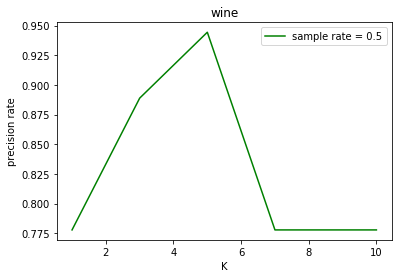

In [26]:
plt.plot(K, wine_1_K,'-g',label="sample rate = " + "0.5")
plt.legend()
plt.title("wine")
plt.xlabel("K")
plt.ylabel("precision rate")

In [27]:
def draw(sample_rates):
    X_arr = []
    y_arr = []
    y_stat_arr = []
    K = [1,3,5,10]
    for sample_rate in sample_rates:
        assert sample_rate>0 and sample_rate<=1
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)
        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        X_arr.append(X)
        y_arr.append(y)
        y_stat_arr.append(y_arr)
        
    print(X_arr)

In [28]:
draw([0.2,0.5,1])

[array([[1.208e+01, 1.330e+00, 2.300e+00, 2.360e+01, 7.000e+01, 2.200e+00,
        1.590e+00, 4.200e-01, 1.380e+00, 1.740e+00, 1.070e+00, 3.210e+00,
        6.250e+02],
       [1.165e+01, 1.670e+00, 2.620e+00, 2.600e+01, 8.800e+01, 1.920e+00,
        1.610e+00, 4.000e-01, 1.340e+00, 2.600e+00, 1.360e+00, 3.210e+00,
        5.620e+02],
       [1.371e+01, 1.860e+00, 2.360e+00, 1.660e+01, 1.010e+02, 2.610e+00,
        2.880e+00, 2.700e-01, 1.690e+00, 3.800e+00, 1.110e+00, 4.000e+00,
        1.035e+03],
       [1.200e+01, 9.200e-01, 2.000e+00, 1.900e+01, 8.600e+01, 2.420e+00,
        2.260e+00, 3.000e-01, 1.430e+00, 2.500e+00, 1.380e+00, 3.120e+00,
        2.780e+02],
       [1.225e+01, 3.880e+00, 2.200e+00, 1.850e+01, 1.120e+02, 1.380e+00,
        7.800e-01, 2.900e-01, 1.140e+00, 8.210e+00, 6.500e-01, 2.000e+00,
        8.550e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, 2.070e+01, 8.000e+01, 1.380e+00,
        1.460e+00, 5.800e-01, 1.620e+00, 3.050e+00, 9.600e-01, 2.060e+00,
        4.9

In [62]:
def draw(sample_rates):
    K = [1,3,5,10]
    precision_rates = []
    for sample_rate in sample_rates:
        assert sample_rate>0 and sample_rate<=1
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)
        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        precision_rate = []
        for k in K:
            clf = KNN(X_train, y_train, k)
            precision_rate.append(clf.score(X_test, y_test))          
        precision_rates.append(precision_rate) 
    
    styles = ['-g',':b','--r']
    plt.title("wine")
    plt.xlabel("K")
    plt.ylabel("precision rate")
    for i in range(len(sample_rates)):
        plt.plot(K, precision_rates[i],styles[i],label="sample rate = " + str(sample_rates[i]))
        plt.legend()

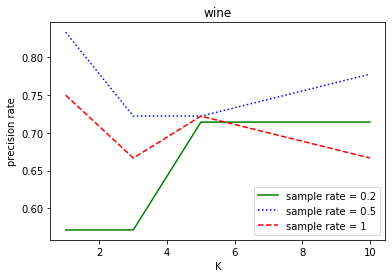

In [63]:
draw([0.2,0.5,1])

In [64]:
def draw(dataset,sample_rates=[0.2,0.5,1],K=[1,3,5,10]):
    precision_rates = []
    for sample_rate in sample_rates:
        assert sample_rate>0 and sample_rate<=1
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)
        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        precision_rate = []
        for k in K:
            clf = KNN(X_train, y_train, k)
            precision_rate.append(clf.score(X_test, y_test))          
        precision_rates.append(precision_rate) 
    
    styles = ['-g',':b','--r']
    plt.title("wine")
    plt.xlabel("K")
    plt.ylabel("precision rate")
    for i in range(len(sample_rates)):
        plt.plot(K, precision_rates[i],styles[i],label="sample rate = " + str(sample_rates[i]))
        plt.legend()

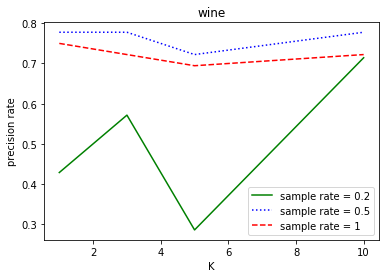

In [65]:
draw()

In [66]:
dataset = datasets.load_wine()

In [67]:
draw(dataset)

TypeError: '>' not supported between instances of 'str' and 'int'

In [68]:
def draw(dataset,sample_rates=[0.2,0.5,1],K=[1,3,5,10]):
    precision_rates = []
    for sample_rate in sample_rates:
        assert sample_rate>0 and sample_rate<=1
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)
        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        precision_rate = []
        for k in K:
            clf = KNN(X_train, y_train, k)
            precision_rate.append(clf.score(X_test, y_test))          
        precision_rates.append(precision_rate) 
    
    styles = ['-g',':b','--r']
    plt.title("wine")
    plt.xlabel("K")
    plt.ylabel("precision rate")
    for i in range(len(sample_rates)):
        plt.plot(K, precision_rates[i],styles[i],label="sample rate = " + str(sample_rates[i]))
        plt.legend()

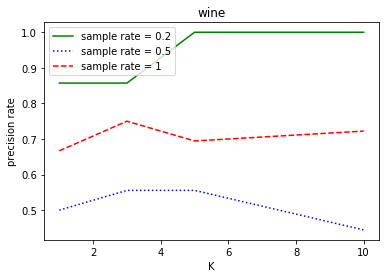

In [69]:
dataset = datasets.load_wine()
draw(dataset)

In [70]:
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [74]:
def draw(dataset,dataset_name,sample_rates=[0.2,0.5,1],K=[1,3,5,10]):
    precision_rates = []
    for sample_rate in sample_rates:
        assert sample_rate>0 and sample_rate<=1
        random.seed(42)
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)
        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        precision_rate = []
        for k in K:
            clf = KNN(X_train, y_train, k)
            precision_rate.append(clf.score(X_test, y_test))          
        precision_rates.append(precision_rate) 
    
    styles = ['-g',':b','--r']
    plt.title(dataset_name)
    plt.xlabel("K")
    plt.ylabel("precision rate")
    for i in range(len(sample_rates)):
        plt.plot(K, precision_rates[i],styles[i],label="sample rate = " + str(sample_rates[i]))
        plt.legend()

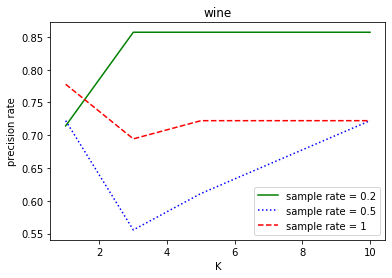

In [80]:
draw(datasets.load_wine(),"wine")

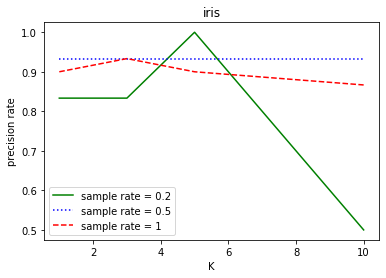

In [83]:
draw(datasets.load_iris(),"iris")

In [88]:
random.seed(42)
idx = random.sample(range(10), 3)
idx

[1, 0, 4]

In [102]:
def draw(sample_rates=[0.2,0.5,1],K=[1,3,5,10]):
    three_datasets = [datasets.load_iris(),datasets.load_wine(),datasets.load_breast_cancer()]
    dataset_names = ["iris","wine","breast_cancer"]
#     random.seed(42)
    total_precision_rates = []
    for dataset in three_datasets:
        precision_rates = []
        for sample_rate in sample_rates:
            assert sample_rate>0 and sample_rate<=1
            nSample = math.floor(dataset.data.shape[0]*sample_rate)
            idx = random.sample(range(dataset.data.shape[0]), nSample)
            X = dataset.data[idx][:]
            y = dataset.target[idx][:]
            y_stat = Counter(y)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            precision_rate = []
            for k in K:
                clf = KNN(X_train, y_train, k)
                precision_rate.append(clf.score(X_test, y_test))          
            precision_rates.append(precision_rate)
            
        total_precision_rates.append(precision_rates)
    
    styles = ["-",":","--"]
    colors = ["r","g","b"]
#     plt.title(dataset_name)
    plt.xlabel("K")
    plt.ylabel("precision rate")
    for i in range(len(three_datasets)):
        for j in range(len(sample_rates)):
            plt.plot(K, total_precision_rates[i][j],styles[j] + colors[i],label=dataset_names[i] + ":" + "sample rate = " + str(sample_rates[j]))
            plt.legend()

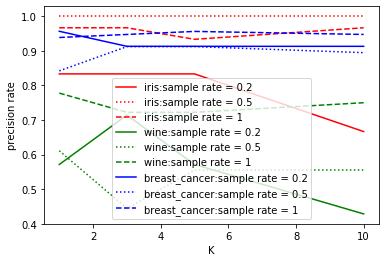

In [107]:
draw()